In [22]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from IPython.display import display
%matplotlib inline

import statsmodels.formula.api as smf

In [12]:
# load data
df = pd.read_csv('./data/new-york.csv', thousands=",") # use "thousands" to handle the thousand comma separator

data_revised = pd.DataFrame()
data_revised["population"] = df["Population"]
data_revised["crime"] = df["Violent\rcrime"]
data_revised["murder"] = df["Murder and\rnonnegligent\rmanslaughter"]
data_revised["rape"] = df["Rape\r(legacy\rdefinition)2"]
data_revised["robbery"] = df["Robbery"]
data_revised["assault"] = df["Aggravated\rassault"]
data_revised["violent_crime"] = df["Murder and\rnonnegligent\rmanslaughter"] + df["Rape\r(legacy\rdefinition)2"] + df["Robbery"] + df["Aggravated\rassault"]
data_revised["property_crime"] = df["Property\rcrime"]

data_revised = data_revised.dropna()

In [14]:
def remove_outliers(data):
    return mstats.winsorize(data, limits=0.05)

for d in data_revised.columns:
    data_revised[d] = remove_outliers(data_revised[d])

In [26]:
# New model

regr = linear_model.LinearRegression()
Y = data_revised["property_crime"]
#X = data_revised[["population", "crime", "murder", "rape", "robbery", "assault"]]
#X = data_revised[["population", "crime"]]
X = data_revised[["population", "murder", "rape", "robbery"]]
regr.fit(X, Y)

# Inspect the results
print("\nCoefficients: ", regr.coef_)
print("\nIntercept: ", regr.intercept_)
print("\nR-squared: ", regr.score(X, Y))


Coefficients:  [  1.38867375e-02  -5.60191494e+01   3.20047748e+01   7.00709090e+00]

Intercept:  3.53792958184

R-squared:  0.880797067018


(array([   2.,    3.,    5.,    7.,   26.,  122.,  155.,   16.,   10.,    2.]),
 array([-666.23572595, -553.39628577, -440.5568456 , -327.71740543,
        -214.87796526, -102.03852509,   10.80091508,  123.64035526,
         236.47979543,  349.3192356 ,  462.15867577]),
 <a list of 10 Patch objects>)

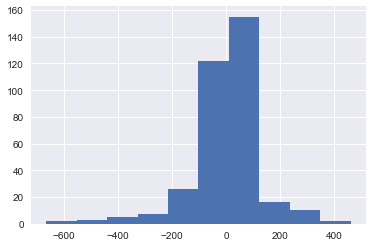

In [27]:
predicted = regr.predict(X).ravel()
actual = data_revised["property_crime"]
residual = predicted - actual

plt.hist(residual)

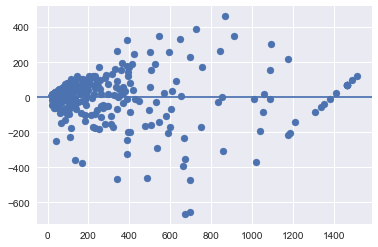

In [28]:
plt.scatter(predicted, residual)
plt.axhline(y=0)

In [29]:
X.corr()

,population,murder,rape,robbery
population,1.000000,0.624830,0.681057,0.801370
murder,0.624830,1.000000,0.648323,0.720477
rape,0.681057,0.648323,1.000000,0.803204
robbery,0.801370,0.720477,0.803204,1.000000


In [31]:
linear_formula = "property_crime ~ population+murder+rape+robbery"
lm = smf.ols(formula=linear_formula, data=data_revised).fit()

In [32]:
# From above
# [  1.37718871e-02   5.79073068e-01  -5.58069810e+01   2.94264814e+01    5.77826356e+00   1.40004440e-01]
lm.params

Intercept      3.537930
population     0.013887
murder       -56.019149
rape          32.004775
robbery        7.007091
dtype: float64

In [33]:
# Anything that is above 0.05 = doesn't tell us anything new
# Crime doesn't tell us anything
# Assault doesn't tell us anything
lm.pvalues

Intercept     7.218113e-01
population    7.452919e-51
murder        5.956474e-03
rape          3.063941e-13
robbery       1.190004e-10
dtype: float64

In [34]:
lm.conf_int()

,0,1
Intercept,-15.990985,23.066844
population,0.012356,0.015417
murder,-95.833766,-16.204533
rape,23.710210,40.299340
robbery,4.933138,9.081044


In [74]:
df = pd.read_csv('./data/new-jersey.csv', thousands=",") # use "thousands" to handle the thousand comma separator

data_sc = pd.DataFrame()
data_sc["population"] = df["Population"]
data_sc["crime"] = df["Violent\rcrime"]
data_sc["murder"] = df["Murder and\rnonnegligent\rmanslaughter"]
data_sc["rape"] = df["Rape\r(legacy\rdefinition)2"]
data_sc["robbery"] = df["Robbery"]
data_sc["assault"] = df["Aggravated\rassault"]
data_sc["property_crime"] = df["Property\rcrime"]


data_sc = data_sc.dropna()

In [75]:
for d in data_sc.columns:
    data_sc[d] = remove_outliers(data_sc[d])

In [76]:
linear_formula = "property_crime ~ population+murder+rape+robbery"
lm = smf.ols(formula=linear_formula, data=data_sc).fit()

In [77]:
lm.params

Intercept     16.081687
population     0.009595
murder       -19.645005
rape          11.434446
robbery        9.744580
dtype: float64

In [78]:
lm.pvalues

Intercept     3.488421e-02
population    3.211694e-59
murder        1.258030e-01
rape          1.138625e-03
robbery       1.775031e-49
dtype: float64

In [ ]:
# take new york
# holdout 20%
# build the model above
# get lm.conf_int()
# run the model on the holdout
# is it in the range?